# Prolexitim Exploratory Analysis (Prolex-Explore)
## Visualizing Text Feature Distribution and Discrimination
<hr>
t-SNE and PCA 2D/3D Visualization of alexithymia tagged narratives using: 

### Classical text processing and analytics with BoW models combined with Word Embeddings
<hr>
Dataset from Prolexitim TAS-20 Spain, Prolexitim NLP and Spanish 3Billion Word2Vec
Sept 2019.<br> Prolexitim dataset version 1.2 (MPGS-TFM-Submission).<br> 
<a target="_blank" href="http://www.conscious-robots.com/papers/TFM_MPGS_Arrabales_vWeb.pdf">Arrabales, R. 2019. Artificial Intelligence Tools for the Evaluation and Treatment of Alexithymia.</a><br> <br>
Raúl Arrabales Moreno (Psicobótica / Serendeepia Research)<br>
<a target="_blank" href="http://www.conscious-robots.com/">http://www.conscious-robots.com/</a> <br>
<hr>
Spanish Word Vectors from: <a taget="_blank" href="https://github.com/aitoralmeida/spanish_word2vec">Spanish 3B Pre-trained Word2Vec</a>

## Load Word Vectors and Documents (texts + labels)
- Word Vectors are obtained from the pre-trained Spanish 3B Word2Vec.
- Documents are obtained from the Prolexitim Pilot Study.
    - Text are narratives from Prolexitim NLP. 
    - Labels are categorical values from Prolexitim TAS-20.


### Loading the word vectors

In [1]:
from gensim.models import KeyedVectors

In [2]:
# My copy of Spanish 3 Billion Word2Vec
word_vectors = KeyedVectors.load('D:\Dropbox-Array2001\Dropbox\DataSets\Spanish Word2Vec\complete.kv', mmap='r')

In [3]:
# Testing Word Vectors for Spanish
word_vectors.most_similar("niño")[0]

('chiquillo', 0.863490104675293)

In [4]:
# Testing Word Vectors for Spanish
# word_vectors.get_vector("niño")

In [5]:
# Testing Word Vectors for Spanish
word_vectors.similar_by_vector(
    word_vectors.get_vector("rey") - 
    word_vectors.get_vector("hombre") + 
    word_vectors.get_vector("mujer"))[0]

('reina', 0.7074883580207825)

### Loading Prolexitim TAS-20 + Text Visualization Dataset Load

In [6]:
import pandas as pd 

In [7]:
viz_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-viz-1.2.csv"

In [8]:
viz_df = pd.read_csv(viz_dataset_path, header=0, delimiter="\t")

In [9]:
viz_df.sample(4)

,Text,AlexLabel,card,TAS20,F1,F2,F3,SubClass
256,es un niño pensando en cual es la respuesta de...,NoAlex,1,40.0,16.0,9.0,15.0,NoAlex-1
35,En esa cueva el agua se filtraba discurriendo ...,NoAlex,11,31.0,12.0,5.0,14.0,NoAlex-11
217,Tras una larga y dura jornada se dispusieron a...,NoAlex,9VH,33.0,8.0,6.0,19.0,NoAlex-9VH
7,Es una pareja y el hombre se encuentra arrepen...,NoAlex,13HM,51.0,15.0,18.0,18.0,NoAlex-13HM


## Text preprocessing

In [40]:
import random
import numpy as np

import re

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\array\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Test tokenization and stemming with our data

randText = random.choice(viz_df['Text'])

# Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Stemmer
stemmer = SnowballStemmer('spanish') 

# Tokenize
tokens = tokenizer.tokenize(randText)

# Remove stop words
words = [x.lower() for x in tokens if x not in stopwords.words('spanish')]

# Get stems
stems = [stemmer.stem(w) for w in words]

print(randText)
print()
print(tokens)
print()
print(words)
print()
print(stems)

El doctor solo pudo certificar su muerte, estaba agotado después de todo el día haciendo visitas y aquello le había dejado tremendamente exhausto. Tan solo tenía que regresar a casa, tomarse un whisky y mañana amanecerá de nuevo.

['El', 'doctor', 'solo', 'pudo', 'certificar', 'su', 'muerte', 'estaba', 'agotado', 'después', 'de', 'todo', 'el', 'día', 'haciendo', 'visitas', 'y', 'aquello', 'le', 'había', 'dejado', 'tremendamente', 'exhausto', 'Tan', 'solo', 'tenía', 'que', 'regresar', 'a', 'casa', 'tomarse', 'un', 'whisky', 'y', 'mañana', 'amanecerá', 'de', 'nuevo']

['el', 'doctor', 'solo', 'pudo', 'certificar', 'muerte', 'agotado', 'después', 'día', 'haciendo', 'visitas', 'aquello', 'dejado', 'tremendamente', 'exhausto', 'tan', 'solo', 'regresar', 'casa', 'tomarse', 'whisky', 'mañana', 'amanecerá', 'nuevo']

['el', 'doctor', 'sol', 'pud', 'certific', 'muert', 'agot', 'despues', 'dia', 'hac', 'visit', 'aquell', 'dej', 'tremend', 'exhaust', 'tan', 'sol', 'regres', 'cas', 'tom', 'whisky'

In [13]:
# Tokenization Function
def get_Tokens(Texts):
    tokenizer = RegexpTokenizer(r'\w+')
    return [tokenizer.tokenize(text) for text in Texts]

In [14]:
def Tokens2Words(Tokens):
    return [tokens.lower() for tokens in Tokens if tokens not in stopwords.words('spanish')]

In [15]:
def Words2Stems(Words):
    return [stemmer.stem(word) for word in Words]

In [16]:
# Wordization Function
def get_Words(TokensList):
    return [Tokens2Words(tokens) for tokens in TokensList]

In [17]:
# Wordization Function
def get_Stems(WordsLists):
    return [Words2Stems(words) for words in WordsLists]

In [18]:
# Add tokens and words to the df
viz_df = viz_df.copy()
viz_df['Tokens'] = get_Tokens(viz_df['Text'])
viz_df['Words'] = get_Words(viz_df['Tokens'])
viz_df['Stems'] = get_Stems(viz_df['Words'])

In [19]:
viz_df.sample(4)

,Text,AlexLabel,card,TAS20,F1,F2,F3,SubClass,Tokens,Words,Stems
215,Acaba de acuchillar a su amante y llora por su...,NoAlex,13HM,36.0,14.0,10.0,12.0,NoAlex-13HM,"[Acaba, de, acuchillar, a, su, amante, y, llor...","[acaba, acuchillar, amante, llora, imperdonabl...","[acab, acuchill, amant, llor, imperdon, acto, ..."
137,Érase un niño que se aburría tanto en sus clas...,NoAlex,1,34.0,13.0,10.0,11.0,NoAlex-1,"[Érase, un, niño, que, se, aburría, tanto, en,...","[érase, niño, aburría, clases, música, dedicab...","[eras, niñ, aburr, clas, music, dedic, dorm, s..."
9,"Un día me propuse cruzar la montaña, subí a lo...",NoAlex,11,36.0,16.0,7.0,13.0,NoAlex-11,"[Un, día, me, propuse, cruzar, la, montaña, su...","[un, día, propuse, cruzar, montaña, subí, alto...","[un, dia, propus, cruz, montañ, sub, alto, mon..."
169,Tras varias semanas trabajando sin parar en la...,NoAlex,9VH,45.0,18.0,9.0,18.0,NoAlex-9VH,"[Tras, varias, semanas, trabajando, sin, parar...","[tras, varias, semanas, trabajando, parar, gra...","[tras, vari, seman, trabaj, par, granj, tio, a..."


In [104]:
# Get all text from dataset
def get_Corpus(df):
    return df['Text'].str.cat()

In [106]:
# get_Corpus(viz_df)

### Generate BoWs with stems


In [180]:
# BoW Vector size
BoW_vector_size = 400

In [181]:
# Create general BoW / TF
BoW = {} 
for list in viz_df['Stems'].values: 
    for stem in list:
        if stem not in BoW.keys(): 
            BoW[stem] = 1
        else: 
            BoW[stem] += 1

In [182]:
print('Number of different words: ' + str(len(BoW)))

Number of different words: 1483


In [183]:
orderedTF = sorted(BoW.items(), key = lambda x: x[1], reverse=True)

In [184]:
# Most frequent words in the datase
orderedTF[:10]

[('violin', 73),
 ('vez', 60),
 ('hombr', 60),
 ('niñ', 59),
 ('eras', 52),
 ('trabaj', 47),
 ('toc', 43),
 ('un', 43),
 ('hac', 42),
 ('descans', 41)]

In [185]:
# Most frequent words in the dataset
import heapq 
freq_stems = heapq.nlargest(BoW_vector_size, BoW, key=BoW.get)
freq_stems[:10]

['violin',
 'vez',
 'hombr',
 'niñ',
 'eras',
 'trabaj',
 'toc',
 'un',
 'hac',
 'descans']

In [186]:
freq_stems[0]

'violin'

In [188]:
# Test Building BoW Model with n most frequent stems

randText = random.choice(viz_df['Stems'])

BoW_vector = np.zeros(BoW_vector_size, dtype=np.int)

for w in randText:
    for i,word in enumerate(freq_stems): 
        if word == w:                     
            BoW_vector[i] += 1                            

In [57]:
# BoW_vector

In [58]:
# print("{0}\n{1}\n".format(randText, np.array(BoW_vector)))

In [196]:
# Custom BoW Function
# - List of stems. 
# - Bow of the corpus. 
# - Size of the BoW Vector. 
def get_BoW_Vector(stems, BoW, size):
    
    BoW_vector = np.zeros(size, dtype=np.int)
    
    for w in stems:
        for i,word in enumerate(BoW): 
            if word == w:                     
                BoW_vector[i] += 1  
                # print("added: " + str(word))
                
    return BoW_vector

In [190]:
# get_BoW_Vector(["violin", "vez", "2", "2", "vez"], freq_stems, BoW_vector_size)

In [197]:
# Same thing with scikit learn using words (instead of stems)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_features = BoW_vector_size, 
    analyzer = 'word',
    stop_words = stopwords.words('spanish'))

X = vectorizer.fit_transform(viz_df['Text']) 

# print(X.toarray())

# print(vectorizer.get_feature_names())

In [198]:
# print(vectorizer.transform(["violín en la casita casa casa en violin niño niño"]).toarray())

In [199]:
# Helper functions for df handling

def get_BoWStemVects(Stems):
    return [get_BoW_Vector(s,freq_stems, BoW_vector_size) for s in Stems]

def get_BoWWordVects(Words):
    return [vectorizer.transform([w]).toarray()[0] for w in Words]



In [200]:
# Add BoW Vectors to the df
viz_df = viz_df.copy()
viz_df['StemBoWVec'] = get_BoWStemVects(viz_df['Stems'])
viz_df['WordBoWVec'] = get_BoWWordVects(viz_df['Text'])

In [201]:
viz_df.sample(4)

,Text,AlexLabel,card,TAS20,F1,F2,F3,SubClass,Tokens,Words,Stems,StemBoWVec,WordBoWVec
88,un hombre que quisiéra seguir compartiendo el ...,NoAlex,13HM,47.0,14.0,13.0,20.0,NoAlex-13HM,"[un, hombre, que, quisiéra, seguir, compartien...","[hombre, quisiéra, seguir, compartiendo, lécho...","[hombr, quisier, segu, compart, lech, espos, u...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
243,Hombre sufre tras ver a su mujer enferma en ca...,Alex,13HM,64.0,23.0,13.0,28.0,Alex-13HM,"[Hombre, sufre, tras, ver, a, su, mujer, enfer...","[hombre, sufre, tras, ver, mujer, enferma, cam...","[hombr, sufr, tras, ver, muj, enferm, cam, gan...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
86,un grupo de amigos descansando antes de volver...,NoAlex,9VH,47.0,14.0,13.0,20.0,NoAlex-9VH,"[un, grupo, de, amigos, descansando, antes, de...","[grupo, amigos, descansando, volver, trabajo]","[grup, amig, descans, volv, trabaj]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
41,un niño al que le gustaba mucho tocar el violí...,NoAlex,1,43.0,15.0,11.0,17.0,NoAlex-1,"[un, niño, al, que, le, gustaba, mucho, tocar,...","[niño, gustaba, tocar, violín, él, perfeccioni...","[niñ, gust, toc, violin, el, perfeccion, ocasi...","[2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Feature vectors using Pre-trained Spanish Word Embeddings

## Vectorizers for documents (narratives) - Doc2Vec
Using existing word embeddings for Spanish we obtain a vector for each word. <br>
We also need to build a single vector representing the entire document.<br>
In this case the Doc vector is build based on the distance value of all word vectors to a emotion cluster.

In [202]:
import numpy as np

In [203]:
# Calculates the mean word vector of a list of words using the indicated word2vec model
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in word2vec_model.vocab]
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        return []

### Calculating a cluster of emotion concepts in the 400-dimensional space

In [204]:
# List of basic emotions
BasicEmotions = ['miedo','amor','asco','ira','odio','tristeza','sorpresa','alegría']

In [205]:
# List of secondary emotions
SecondEmotions = ['cansancio','vergüenza', 'culpa', 'bochorno', 'desprecio', 'complacencia', 'orgullo',
                  'entusiasmo', 'placer', 'satisfacción', 'celos', 'confianza', 'disgusto', 'felicidad',
                  'alivio', 'sufrimiento', 'afecto', 'agradecimiento', 'cariño', 'compasión', 'esperanza',
                  'euforia', 'gozo', 'ilusión', 'pasión', 'aburrimiento', 'agobio', 'angustia', 'ansiedad',
                  'decepción', 'desaliento', 'desconcierto', 'desconfianza', 'desdicha', 'desencanto',
                  'desesperación', 'desmotivación', 'desprecio', 'dolor', 'estrés', 'frustración', 'envidia',
                  'frustración', 'humillación', 'impaciencia', 'indignación', 'infelicidad', 'lástima', 
                  'melancolía', 'preocupación', 'pudor', 'rencor', 'rabia', 'remordimiento', 'soledad',
                  'admiración', 'excitación', 'sopor', 'enojo', 'júbilo', 'molestia', 'nostalgia', 'pánico',
                  'pavor', 'recelo', 'regocijo', 'serenidad', 'sosiego', 'tentación', 'turbación', 'hastío',
                  'fastidio', 'fervor', 'fobia', 'frenesí', 'furia', 'espanto', 'exaltación', 'extrañeza',
                  'estupor', 'desconsuelo', 'desidia', 'congoja', 'cólera', 'calma', 'condescendencia', 
                  'contrariedad', 'concentración', 'alborozo', 'aflicción', 'añoranza', 'apatía', 'afecto',
                  'abatimiento', 'asombro', 'enamorado', 'arrepentimiento', 'abrumado', 'desazón', 'aflicción',
                  'gratitud', 'interés', 'diversión', 'plenitud', 'temor', 'terror', 'pereza', 'ofendido', 'desamor',
                  'desasosiego', 'resquemor', 'desorientación', 'exasperación', 'soberbia', 'timidez', 
                  'incredulidad', 'ternura']

In [206]:
# List of positive emotions
PosEmotions = ['amor','alegría','orgullo','entusiasmo','placer','satisfacción','confianza','felicidad',
               'alivio','afecto','agradecimiento', 'cariño', 'compasión', 'esperanza','euforia', 'gozo', 
               'ilusión', 'pasión','admiración', 'júbilo','regocijo', 'serenidad', 'sosiego','fervor',
               'frenesí','calma','afecto','enamorado', 'gratitud', 'interés', 'diversión', 'plenitud',
               'ternura']

In [207]:
# List of negative emotions
NegEmotions = ['miedo','asco','ira','odio','tristeza','cansancio','vergüenza', 'culpa', 'bochorno', 'desprecio',
               'celos','disgusto','sufrimiento','aburrimiento', 'agobio', 'angustia', 'ansiedad','decepción', 
               'desaliento', 'desconcierto', 'desconfianza', 'desdicha', 'desencanto','desesperación', 'desmotivación', 
               'desprecio', 'dolor', 'estrés', 'frustración', 'envidia','frustración', 'humillación', 'impaciencia', 
               'indignación', 'infelicidad', 'lástima', 'melancolía', 'preocupación', 'pudor', 'rencor', 'rabia', 
               'remordimiento', 'soledad','sopor','enojo','molestia','pánico','pavor', 'recelo', 'turbación', 'hastío',
               'fastidio','fobia', 'furia', 'espanto','estupor', 'desconsuelo', 'desidia', 'congoja', 'cólera',
               'contrariedad','aflicción', 'añoranza','abatimiento','arrepentimiento', 'abrumado', 'desazón', 'aflicción',
               'temor', 'terror', 'pereza','ofendido', 'desamor', 'desasosiego', 'resquemor', 'desorientación', 'exasperación']

In [218]:
# Complete list of all emotions
AllEmotions = BasicEmotions + SecondEmotions

In [219]:
len(AllEmotions)

125

In [237]:
# Create data frame with emotions and their corresponding vectors
emotions_df_cols = ['EmotionName', 'Polarity', 'Basic']

emotions_df = pd.DataFrame(columns = emotions_df_cols)

In [238]:
# Fill the new df with data

for emotion in BasicEmotions:
    emotions_df.loc[len(emotions_df)] = [emotion, 'N/A', 'True']
    
for emotion in SecondEmotions:
    if emotion not in emotions_df['EmotionName']:
        emotions_df.loc[len(emotions_df)] = [emotion, 'N/A', 'False']
        
def getPolarity(row):
    if row['EmotionName'] in PosEmotions:
        return 'Positive'
    else:
        return 'Negative'
        
emotions_df['Polarity'] = emotions_df.apply(getPolarity, axis=1)
        

In [239]:
emotions_df

,EmotionName,Polarity,Basic
0,miedo,Negative,True
1,amor,Positive,True
2,asco,Negative,True
3,ira,Negative,True
4,odio,Negative,True
5,tristeza,Negative,True
6,sorpresa,Negative,True
7,alegría,Positive,True
8,cansancio,Negative,False
9,vergüenza,Negative,False


125

In [210]:
# Mean vector for basic emotions
BasicEmotionsVec = get_mean_vector(word_vectors, BasicEmotions)

# Mean vector for secondary emotions
SecondEmotionsVec = get_mean_vector(word_vectors, SecondEmotions)

# Mean vector for all emotions
AllEmotionsVec = get_mean_vector(word_vectors, AllEmotions)

# Mean vector for positive emotions
PosEmotionsVec = get_mean_vector(word_vectors, PosEmotions)

# Mean vector for negative emotions
NegEmotionsVec = get_mean_vector(word_vectors, NegEmotions)

In [211]:
word_vectors.similar_by_vector(PosEmotionsVec)

[('alegría', 0.8047903180122375),
 ('afecto', 0.7779877185821533),
 ('ternura', 0.7621577978134155),
 ('gozo', 0.757392406463623),
 ('gratitud', 0.7568492889404297),
 ('compasión', 0.7439577579498291),
 ('felicidad', 0.7397865056991577),
 ('admiración', 0.7357223033905029),
 ('emoción', 0.7333118915557861),
 ('satisfacción', 0.7311954498291016)]

In [212]:
word_vectors.similar_by_vector(NegEmotionsVec)

[('angustia', 0.8621305227279663),
 ('tristeza', 0.8261114954948425),
 ('congoja', 0.8229580521583557),
 ('aflicción', 0.8225841522216797),
 ('frustración', 0.8151585459709167),
 ('enojo', 0.8146544098854065),
 ('desazón', 0.8122626543045044),
 ('pesadumbre', 0.8033219575881958),
 ('inquietud', 0.8005258440971375),
 ('ansiedad', 0.7956131100654602)]

In [213]:
word_vectors.distances(AllEmotionsVec, ['hola'])[0]

1.043916

In [214]:
word_vectors.distances(AllEmotionsVec, ['amor'])[0]

0.4462517

In [215]:
word_vectors.cosine_similarities(AllEmotionsVec, 
                                 [word_vectors.get_vector("niño"),
                                  word_vectors.get_vector("quiero"),
                                  word_vectors.get_vector("amor"),
                                  word_vectors.get_vector("casa")])

array([0.22716996, 0.03768701, 0.5537483 , 0.09603073], dtype=float32)

## Converting texts into 400-dimensional vecs

In [21]:
docs_df = viz_df.copy()

In [22]:
docs_df['Text'] = docs_df['Text'].apply(lambda x: get_mean_vector(word_vectors, x.split()))

In [23]:
docs_df['Text'].shape[0]

271

In [24]:
docs_df.sample(2)

,Text,AlexLabel,card,SubClass
238,"[1.0921897, -1.3773147, -0.02553477, 0.5166553...",NoAlex,11,NoAlex-11
86,"[0.320334, -0.8308433, -0.85727763, 0.5418416,...",NoAlex,9VH,NoAlex-9VH


## Preparing data for visualization

In [25]:
# Name the new columns for features 
# Xi are the Doc2Vec dimensions
feat_cols = [ 'X-'+str(i) for i in range(word_vectors.vector_size) ]

In [26]:
# Add Xi to a new dataframe as columns
df = pd.DataFrame(np.column_stack(list(zip(*docs_df['Text'].get_values()))), columns=feat_cols)
df.shape

(271, 400)

In [27]:
# Add the label to the df as a new column
df['y'] = docs_df['AlexLabel'].get_values()
df.shape

(271, 401)

In [28]:
df.sample(4)

,X-0,X-1,X-2,X-3,X-4,X-5,X-6,X-7,X-8,X-9,...,X-391,X-392,X-393,X-394,X-395,X-396,X-397,X-398,X-399,y
200,-0.163496,-0.597384,-0.334226,-0.312711,0.489902,-0.500147,0.745960,-0.321532,0.417892,-0.475484,...,-0.294026,-0.002750,0.578811,-0.330797,0.047100,0.191971,-0.006895,1.070760,0.219936,Alex
50,-0.097812,-0.567042,-0.420780,0.534808,0.541989,-0.260806,0.063615,-0.330307,-0.210334,0.459778,...,-0.610138,-0.013034,0.758466,-0.369661,-0.168655,0.721818,0.016812,0.919923,0.032114,NoAlex
8,0.132201,-0.761217,-0.944512,-0.122830,1.065322,-0.568012,0.116376,0.243056,0.199743,-0.080723,...,-0.319565,-0.176035,0.028891,0.025462,-0.710356,0.289243,0.399063,0.515269,0.045404,NoAlex
237,-0.657808,-0.838520,-0.383117,-0.367926,0.935128,0.036101,0.179133,-0.407831,0.937514,-0.017607,...,-0.077768,-0.171787,0.776328,-0.317432,-0.713515,-0.249397,1.015298,0.964268,-0.128045,NoAlex


In [29]:
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (271, 401)


## Using PCA to project into a 2D space

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)

In [33]:
df['pca-1'] = pca_result[:,0]
df['pca-2'] = pca_result[:,1]

In [34]:
df.sample(4)

,X-0,X-1,X-2,X-3,X-4,X-5,X-6,X-7,X-8,X-9,...,X-393,X-394,X-395,X-396,X-397,X-398,X-399,y,pca-1,pca-2
264,-0.154043,-0.738234,-1.346447,-0.225724,0.932469,-0.399016,0.281528,-0.618201,0.258167,-0.416905,...,0.344288,-0.719736,-0.202969,-0.232134,0.727870,1.357108,0.023455,Alex,-1.455873,-0.132326
17,0.111428,-0.837695,-0.654304,-0.637068,0.833316,-0.656078,-0.366503,-0.255694,0.425809,0.120263,...,-0.193532,-0.012530,-0.778033,-0.538829,1.015139,0.872723,-0.049058,NoAlex,-0.764464,-2.131534
86,0.320334,-0.830843,-0.857278,0.541842,1.526618,-0.445657,0.169099,-0.629589,-0.393408,-0.576042,...,0.661649,-0.593585,-0.898826,-1.032610,0.938776,2.197415,-0.088825,NoAlex,-3.447955,1.908487
140,-0.216879,-0.702176,-0.334212,0.338466,0.972673,-0.798958,-0.010087,-0.677729,0.078210,-0.037030,...,1.509063,0.053040,-0.578482,0.795520,-0.870476,0.736999,0.835187,NoAlex,5.267655,-2.097949


In [35]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.21227731 0.06680973]


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

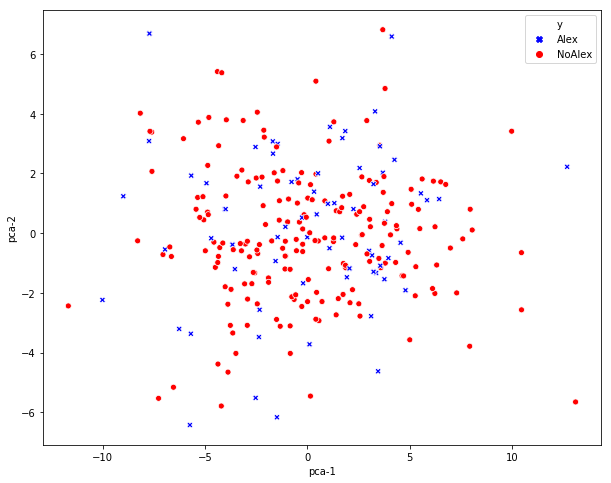

In [40]:
plt.figure(figsize=(10,8))
markers = {"Alex": "X", "NoAlex": "o"}
sns.scatterplot(
    x="pca-1", 
    y="pca-2",
    hue="y",
    style="y",
    palette=sns.color_palette(["#0000ff", "#ff0000"]),
    data=df,
    markers=markers,
    legend="full",
    alpha=1
)

## Using PCA to project into a 3D space

In [41]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

In [42]:
df['pca-1'] = pca_result[:,0]
df['pca-2'] = pca_result[:,1]
df['pca-3'] = pca_result[:,2]

In [43]:
df.sample(4)

,X-0,X-1,X-2,X-3,X-4,X-5,X-6,X-7,X-8,X-9,...,X-394,X-395,X-396,X-397,X-398,X-399,y,pca-1,pca-2,pca-3
206,0.388908,0.006849,-0.797448,-0.634822,1.582541,-0.694459,-0.437666,-0.271410,0.024513,-0.689414,...,-0.974001,-0.685190,-0.548028,0.279012,0.741474,-0.161273,Alex,-5.744339,-6.426547,0.213500
232,0.348644,-1.117189,-0.638708,0.444595,0.516731,-0.142488,-0.013959,-0.121311,-0.195286,0.058360,...,-0.224643,0.007297,0.101970,0.386939,0.262069,0.570791,NoAlex,3.906293,0.719756,2.681361
200,-0.163496,-0.597384,-0.334226,-0.312711,0.489902,-0.500147,0.745960,-0.321532,0.417892,-0.475484,...,-0.330797,0.047100,0.191971,-0.006895,1.070760,0.219936,Alex,3.159852,-0.741870,-0.455702
169,-0.007462,-0.921400,-1.314328,-0.304174,1.032015,-0.517898,0.158670,-0.814741,-0.055199,0.448150,...,-1.125515,-0.887321,-0.601460,0.887915,1.821122,0.327035,NoAlex,-5.264001,0.527788,-0.051952


In [44]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.21227735 0.06680972 0.06338171]


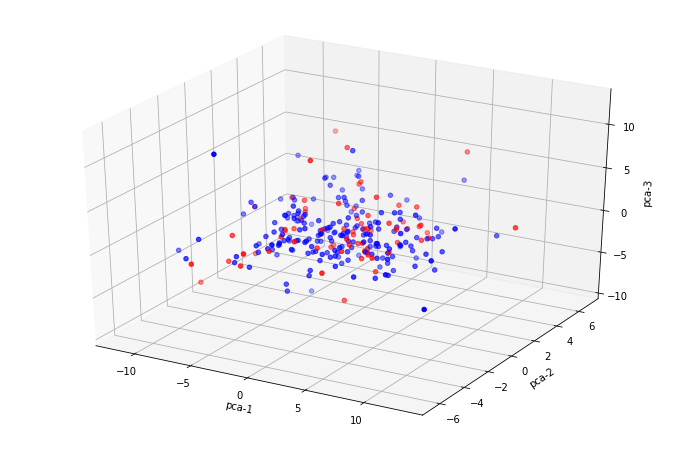

In [45]:
colors = {'Alex':'red', 'NoAlex':'blue'}
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs=df["pca-1"], 
    ys=df["pca-2"], 
    zs=df["pca-3"], 
    c=df['y'].apply(lambda x: colors[x])
)
ax.set_xlabel('pca-1')
ax.set_ylabel('pca-2')
ax.set_zlabel('pca-3')
plt.show()

## Using t-SNE to project into a 2D space

In [48]:
from sklearn.manifold import TSNE

In [49]:
data = df[feat_cols].values

In [50]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 271 samples in 0.004s...
[t-SNE] Computed neighbors for 271 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 271 / 271
[t-SNE] Mean sigma: 3.174130
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.476891
[t-SNE] KL divergence after 300 iterations: 1.081816


In [51]:
df['tsne-2d-1'] = tsne_results[:,0]
df['tsne-2d-2'] = tsne_results[:,1]

In [52]:
df.sample(4)

,X-0,X-1,X-2,X-3,X-4,X-5,X-6,X-7,X-8,X-9,...,X-396,X-397,X-398,X-399,y,pca-1,pca-2,pca-3,tsne-2d-1,tsne-2d-2
210,1.118459,-0.363183,-2.325202,-1.498535,0.449706,-0.432613,-0.601883,-0.270360,1.264371,-0.323065,...,-0.862088,2.111035,1.493838,-1.885173,NoAlex,-11.687435,-2.436841,-3.078526,-3.961662,-17.923704
111,0.382354,-0.452906,-0.919709,0.027613,1.078115,-0.690729,0.453763,-0.802465,-0.012711,0.156963,...,-0.127875,0.437508,1.499100,0.043039,NoAlex,-2.049782,0.290162,-1.805191,1.049268,-6.291683
65,-0.151910,-1.050460,-1.137015,0.293178,0.444000,-0.855390,0.177459,0.065164,0.424514,-0.435053,...,0.344060,0.889195,1.026724,0.212306,Alex,3.685163,2.023967,-0.295305,4.634480,12.974747
208,-0.392065,-0.860844,0.004348,-0.683359,2.199303,-0.591141,0.745220,-1.150335,0.982833,0.282903,...,-0.686094,1.244086,2.709211,0.009035,NoAlex,-5.444190,0.802128,-3.064375,12.591675,-10.285513


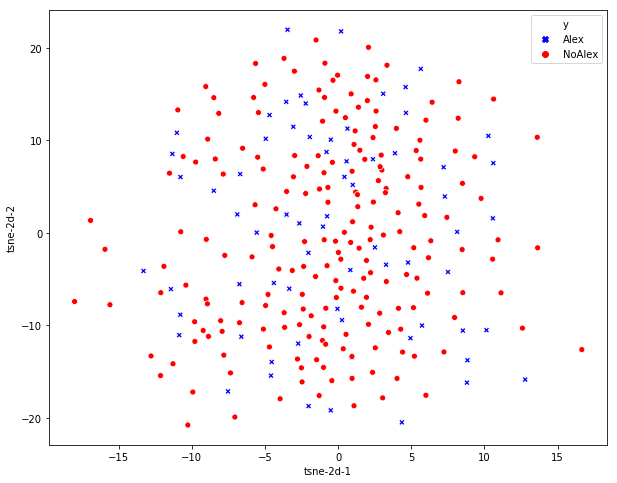

In [53]:
plt.figure(figsize=(10,8))
markers = {"Alex": "X", "NoAlex": "o"}
sns.scatterplot(
    x="tsne-2d-1", 
    y="tsne-2d-2",
    hue="y",
    style="y",
    palette=sns.color_palette(["#0000ff", "#ff0000"]),
    data=df,
    markers=markers,
    legend="full",
    alpha=1
)

### Reduce dimensionality from 400 to 50 dimensions before using t-SNE

In [54]:
# Using PCA to reduce to 50 dimensions
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

In [55]:
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8954629302024841


In [56]:
# Using t-SNE to reduce from 50 to 2 dimensions
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

In [57]:
df['tsne-pca50-1'] = tsne_pca_results[:,0]
df['tsne-pca50-2'] = tsne_pca_results[:,1]

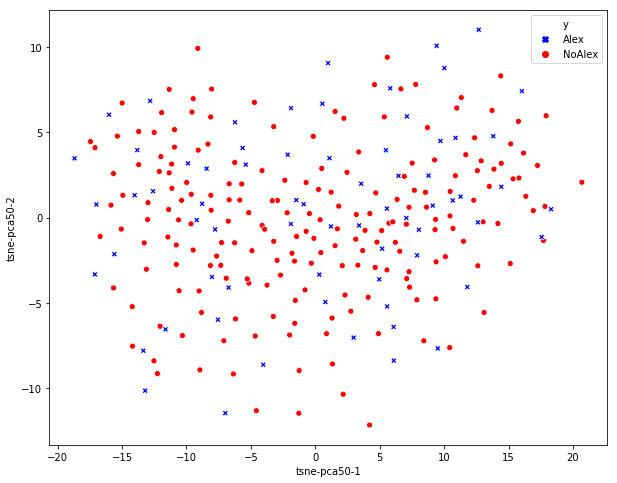

In [59]:
plt.figure(figsize=(10,8))
markers = {"Alex": "X", "NoAlex": "o"}
sns.scatterplot(
    x="tsne-pca50-1", 
    y="tsne-pca50-2",
    hue="y",
    style="y",
    palette=sns.color_palette(["#0000ff", "#ff0000"]),
    data=df,
    markers=markers,
    legend="full",
    alpha=1
)

## Stimuli Discrimination - Using card as class

In [61]:
df['y'] = docs_df['card'].get_values()

In [63]:
df['y']

0         1
1        11
2      13HM
3        11
4        11
5       9VH
6         1
7      13HM
8         1
9        11
10       11
11        1
12     13HM
13       11
14       11
15      9VH
16      9VH
17      9VH
18      9VH
19      9VH
20       11
21     13HM
22        1
23       11
24      9VH
25       11
26       11
27      9VH
28        1
29        1
       ... 
241     9VH
242      11
243    13HM
244       1
245     9VH
246      11
247    13HM
248       1
249     9VH
250      11
251    13HM
252       1
253     9VH
254      11
255    13HM
256       1
257     9VH
258    13HM
259       1
260     9VH
261      11
262    13HM
263       1
264     9VH
265      11
266    13HM
267       1
268     9VH
269      11
270    13HM
Name: y, Length: 271, dtype: object

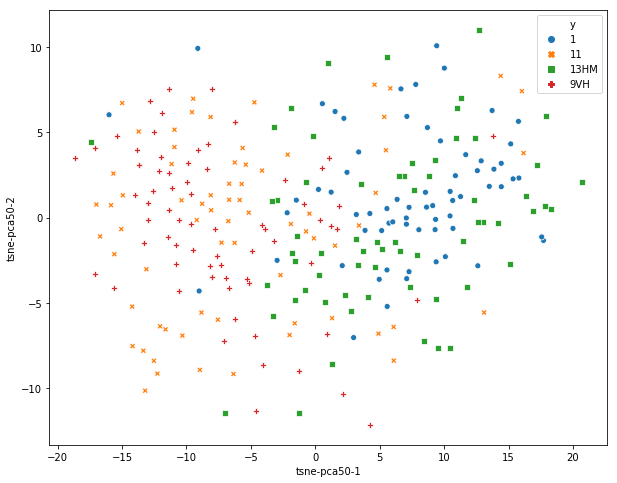

In [71]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-pca50-1", 
    y="tsne-pca50-2",
    hue="y",
    style="y",
    data=df,
    legend="full",
    alpha=1
)

## Subclass Discrimination - Using pair Card-AlexLabel as class

In [72]:
df['y'] = docs_df['SubClass'].get_values()

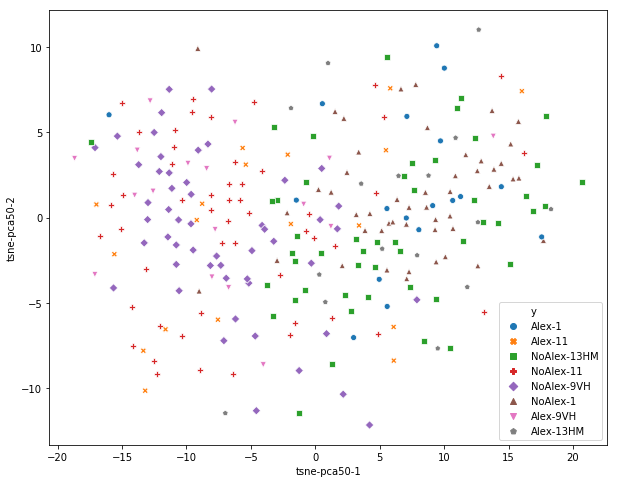

In [73]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-pca50-1", 
    y="tsne-pca50-2",
    hue="y",
    style="y",
    data=df,
    legend="full",
    alpha=1
)

## Alex Vs. NoAlex for each specific TAT card

In [78]:
subset_df = df[(df.y == 'Alex-1') | (df.y == 'NoAlex-1')]

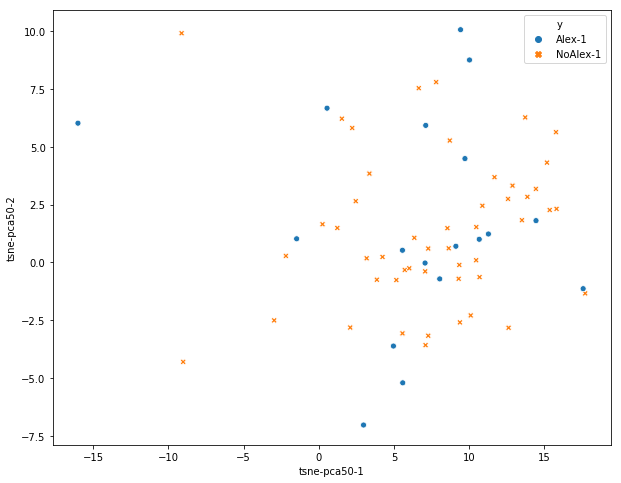

In [80]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-pca50-1", 
    y="tsne-pca50-2",
    hue="y",
    style="y",
    data=subset_df,
    legend="full",
    alpha=1
)

In [81]:
subset_df = df[(df.y == 'Alex-11') | (df.y == 'NoAlex-11')]

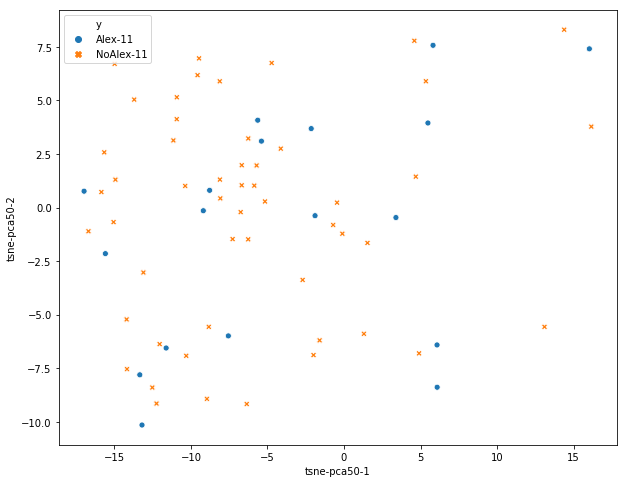

In [82]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-pca50-1", 
    y="tsne-pca50-2",
    hue="y",
    style="y",
    data=subset_df,
    legend="full",
    alpha=1
)

In [83]:
subset_df = df[(df.y == 'Alex-9VH') | (df.y == 'NoAlex-9VH')]

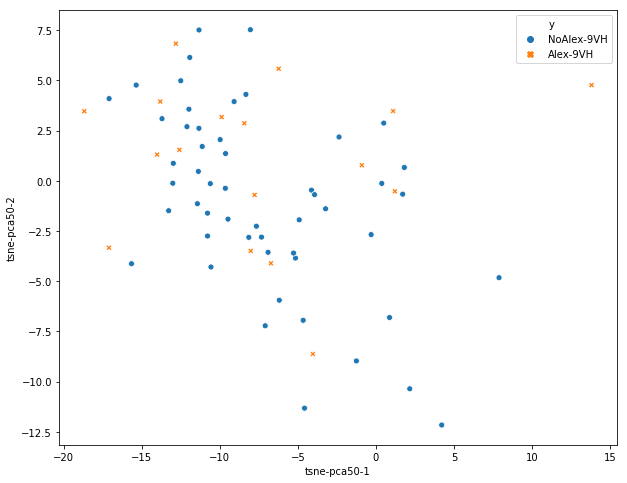

In [84]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-pca50-1", 
    y="tsne-pca50-2",
    hue="y",
    style="y",
    data=subset_df,
    legend="full",
    alpha=1
)

In [85]:
subset_df = df[(df.y == 'Alex-13HM') | (df.y == 'NoAlex-13HM')]

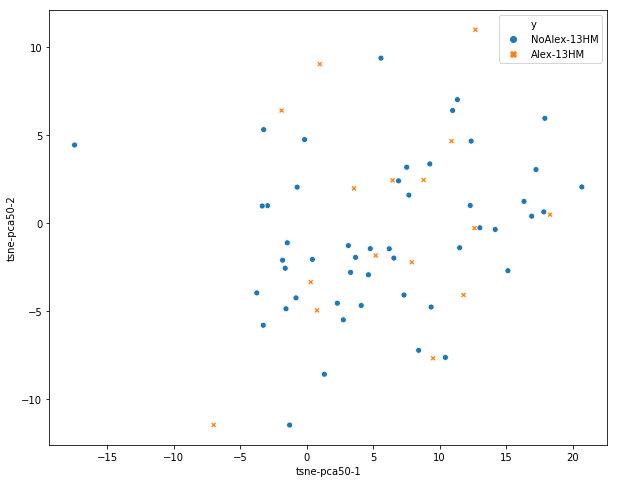

In [86]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-pca50-1", 
    y="tsne-pca50-2",
    hue="y",
    style="y",
    data=subset_df,
    legend="full",
    alpha=1
)

## Save text processed data to a new CSV file

In [44]:
# Save text processed dataset
tok_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-text-processed-1.2.csv"

In [45]:
viz_df.to_csv(tok_dataset_path, sep='\t', encoding='utf-8', index=False)